# Import dependencies

In [80]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amins\AppData\Roaming\nltk_data...


# Read Dataset
strip() : Remove spaces at the beginning and at the end of the string.

set() : labels (list) convertes to (set), only a single copy of all the duplicate elements gets placed into it.

In [175]:
filename = "EmotionClassificationDataSet/train.txt"
sentences_train = []
labels_train = []

lines = open(filename, encoding='utf-8').read().strip().split('\n')
for line in lines:
    m = line.split(';')
    sentences_train.append(m[0])
    labels_train.append(m[1])

filename = "EmotionClassificationDataSet/test.txt"
sentences_test = []
labels_test = []

lines = open(filename, encoding='utf-8').read().strip().split('\n')
for line in lines:
    m = line.split(';')
    sentences_test.append(m[0])
    labels_test.append(m[1])
    
filename = "EmotionClassificationDataSet/val.txt"
sentences_val = []
labels_val = []

lines = open(filename, encoding='utf-8').read().strip().split('\n')
for line in lines:
    m = line.split(';')
    sentences_val.append(m[0])
    labels_val.append(m[1])
    
    
label_list_train = set(labels_train)
label_train = list(label)  

label_list_test = set(labels_test)
label_test = list(label)

label_list_val = set(labels_val)
label_val = list(label)

df_train = pd.DataFrame({"sentence":sentences_train,
                         "label":labels_train})
df_test = pd.DataFrame({"sentence":sentences_test,
                         "label":labels_test})
df_val = pd.DataFrame({"sentence":sentences_val,
                         "label":labels_val})


print("Total number of sentences for train: ",len(sentences_train))
print("Total number of sentences for test: ",len(sentences_test))
print("Total number of sentences for validation: ",len(sentences_val),'\n')

print("Total number of labels for train: ",len(label_train), label_train)
print("Total number of labels for test: ",len(label_test), label_test)
print("Total number of labels for validation: ",len(label_val), label_val)


Total number of sentences for train:  16000
Total number of sentences for test:  2000
Total number of sentences for validation:  2000 

Total number of labels for train:  6 ['love', 'anger', 'joy', 'surprise', 'fear', 'sadness']
Total number of labels for test:  6 ['love', 'anger', 'joy', 'surprise', 'fear', 'sadness']
Total number of labels for validation:  6 ['love', 'anger', 'joy', 'surprise', 'fear', 'sadness']


# Exploratory Data Analysis (EDA)

Training set: joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64 

Test set: joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64 

Validation set: joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64 



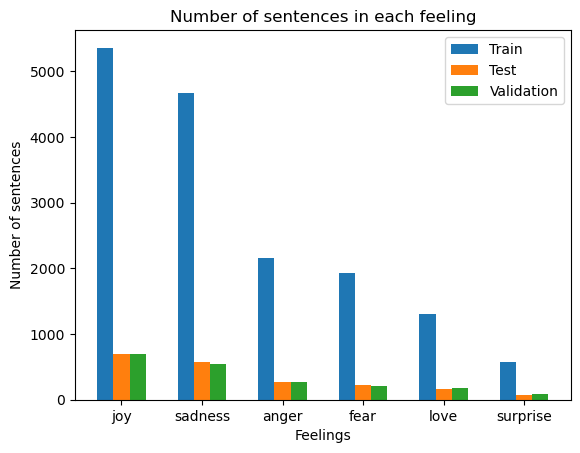

In [173]:
# a = pd.DataFrame(list(labels_train)).value_counts()
print("Training set:",df_train['label'].value_counts(),'\n')


# b = pd.DataFrame(list(labels_test)).value_counts()
print("Test set:",df_test['label'].value_counts(), '\n')


# c = pd.DataFrame(list(labels_val)).value_counts()
print("Validation set:",df_val['label'].value_counts(),'\n')

x_label = np.arange(len(label_train))

# plt.bar(x_label-0.2, a.values,0.2, label='Train')
# plt.bar(x_label, b.values,0.2, label='Test')
# plt.bar(x_label+0.2, c.values,0.2, label='Validation')

plt.bar(x_label-0.2, df_train['label'].value_counts(), 0.2, label='Train')
plt.bar(x_label, df_test['label'].value_counts(), 0.2, label='Test')
plt.bar(x_label+0.2, df_val['label'].value_counts(), 0.2, label='Validation')

plt.xticks(x_label, df_train['label'].value_counts().index)#label_train[::-1])
plt.xlabel("Feelings")
plt.ylabel("Number of sentences")
plt.title("Number of sentences in each feeling")
plt.legend()
plt.show()


# Missing data
No missing data

In [149]:
print(f" Number of sentences in train set = {len(sentences_train)}, Number of labeles in train set = {len(labels_train)}")
print(f" Number of sentences in test set = {len(sentences_test)}, Number of labeles in test set = {len(labels_test)}")
print(f" Number of sentences in validation set = {len(sentences_val)}, Number of labeles in validation set = {len(labels_val)}")


 Number of sentences in train set = 16000, Number of labeles in train set = 16000
 Number of sentences in test set = 2000, Number of labeles in test set = 2000
 Number of sentences in validation set = 2000, Number of labeles in validation set = 2000


# Number of words in a sentences
Love sentences are more wordy than other

In [153]:
df_train['word_count'] = df_train['sentence'].apply(lambda x: len(str(x).split()))

print("Average number of words in Sadness sentences: ", df_train[df_train['label']=='sadness']['word_count'].mean()) #Disaster tweets
print("Average number of words in Fear sentences: ",df_train[df_train['label']=='fear']['word_count'].mean()) #Disaster tweets
print("Average number of words in Surprise sentences: ",df_train[df_train['label']=='surprise']['word_count'].mean()) #Disaster tweets
print("Average number of words in Joy sentences: ",df_train[df_train['label']=='joy']['word_count'].mean()) #Disaster tweets
print("Average number of words in Anger sentences: ",df_train[df_train['label']=='anger']['word_count'].mean()) #Disaster tweets
print("Average number of words in Love sentences: ",df_train[df_train['label']=='love']['word_count'].mean()) #Disaster tweets


Average number of words in Sadness sentences:  18.361980282897555
Average number of words in Fear sentences:  18.84460505937016
Average number of words in Surprise sentences:  19.97027972027972
Average number of words in Joy sentences:  19.498135024244686
Average number of words in Anger sentences:  19.229735988883743
Average number of words in Love sentences:  20.70015337423313


# Number of characters in a sentences
Love sentences are longer than the other

In [155]:
df_train['char_count'] = df_train['sentence'].apply(lambda x: len(str(x)))

print("Average number of characters in Sadness sentences: ", df_train[df_train['label']=='sadness']['char_count'].mean()) #Disaster tweets
print("Average number of characters in Fear sentences: ",df_train[df_train['label']=='fear']['char_count'].mean()) #Disaster tweets
print("Average number of characters in Surprise sentences: ",df_train[df_train['label']=='surprise']['char_count'].mean()) #Disaster tweets
print("Average number of characters in Joy sentences: ",df_train[df_train['label']=='joy']['char_count'].mean()) #Disaster tweets
print("Average number of characters in Anger sentences: ",df_train[df_train['label']=='anger']['char_count'].mean()) #Disaster tweets
print("Average number of characters in Love sentences: ",df_train[df_train['label']=='love']['char_count'].mean()) #Disaster tweets


Average number of characters in Sadness sentences:  92.55057865409344
Average number of characters in Fear sentences:  96.12390294269488
Average number of characters in Surprise sentences:  101.67657342657343
Average number of characters in Joy sentences:  98.5544572920552
Average number of characters in Anger sentences:  96.91153311718388
Average number of characters in Love sentences:  104.03374233128834
